In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# Part 1: Python

## EDA

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
print('Pandas: {}'.format(pd.__version__)) 
print('Numpy: {}'.format(np.__version__))
# print('Matplotlib: {}'.format(matplotlib.pyplot.__version__))
print('Seaborn: {}'.format(sns.__version__))

Pandas: 2.2.2
Numpy: 2.0.2
Seaborn: 0.13.2


In [4]:
# Load Modules, Functions, Objects
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [5]:
data = pd.read_csv("/kaggle/input/iris/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [10]:
df = data.loc[:, data.columns != 'Id']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
index = df.columns
index

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
for col in index:
    print(f"Number of Unique values in the `{col}` attribute:" , df[col].nunique())
    print(f"Distinct unique values in the `{col}` attribute:" , np.sort(df[col].unique()))
    print(f"Data Type： {df[col].dtype}")
    print("-" * 70)

Number of Unique values in the `SepalLengthCm` attribute: 35
Distinct unique values in the `SepalLengthCm` attribute: [4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.
 6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.6 7.7 7.9]
Data Type： float64
----------------------------------------------------------------------
Number of Unique values in the `SepalWidthCm` attribute: 23
Distinct unique values in the `SepalWidthCm` attribute: [2.  2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8
 3.9 4.  4.1 4.2 4.4]
Data Type： float64
----------------------------------------------------------------------
Number of Unique values in the `PetalLengthCm` attribute: 43
Distinct unique values in the `PetalLengthCm` attribute: [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.9 3.  3.3 3.5 3.6 3.7 3.8 3.9 4.  4.1
 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
 6.  6.1 6.3 6.4 6.6 6.7 6.9]
Data Type： float64
------------------------------------

In [14]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

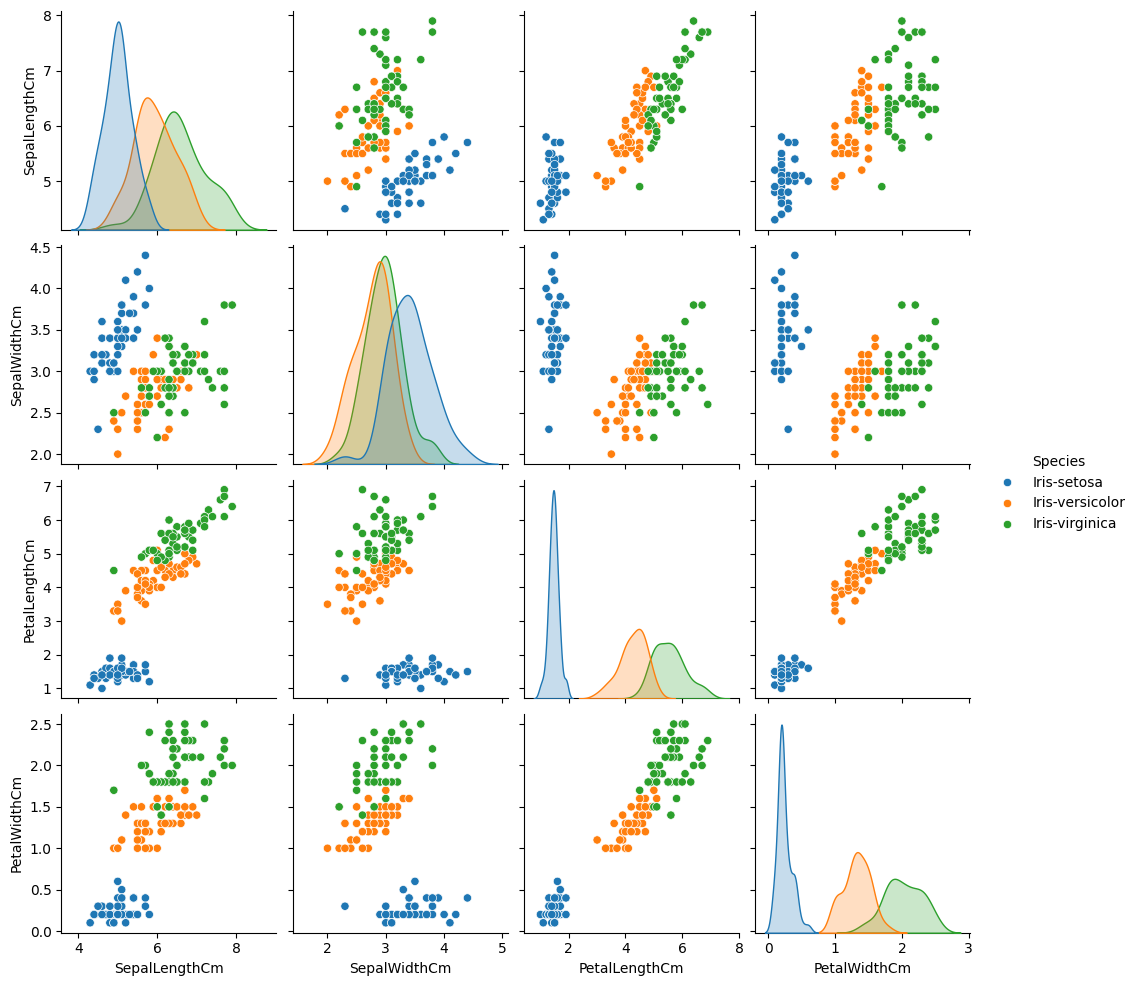

In [15]:
sns.pairplot(data = df, hue="Species")

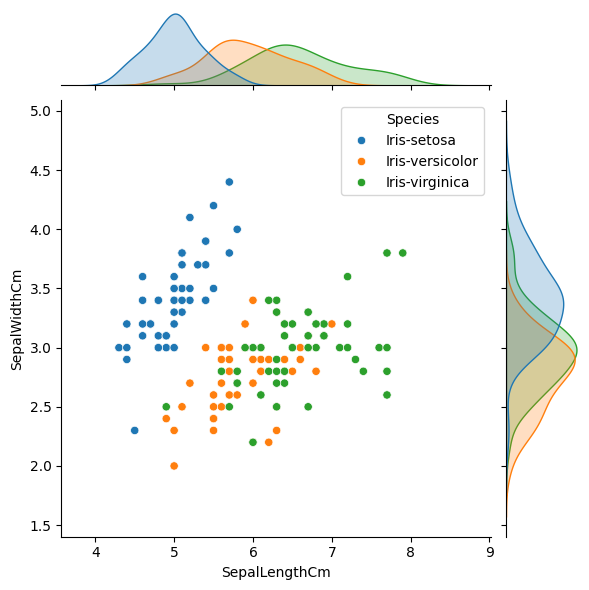

In [16]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", hue = 'Species',
              data=df)

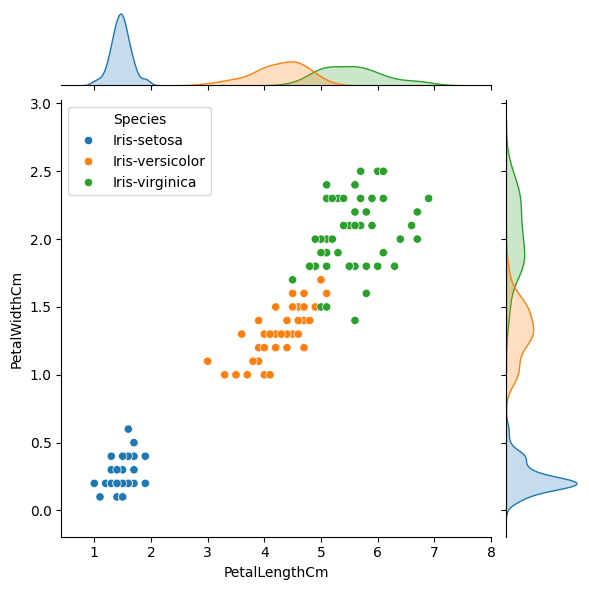

In [17]:
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", hue = 'Species', data=df)

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

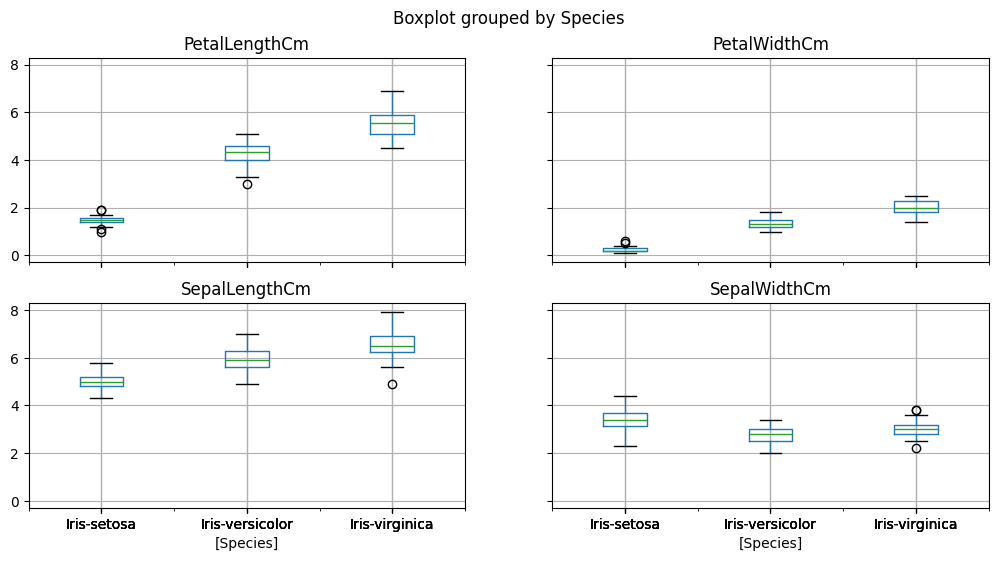

In [18]:
df.boxplot(by="Species", figsize=(12, 6))

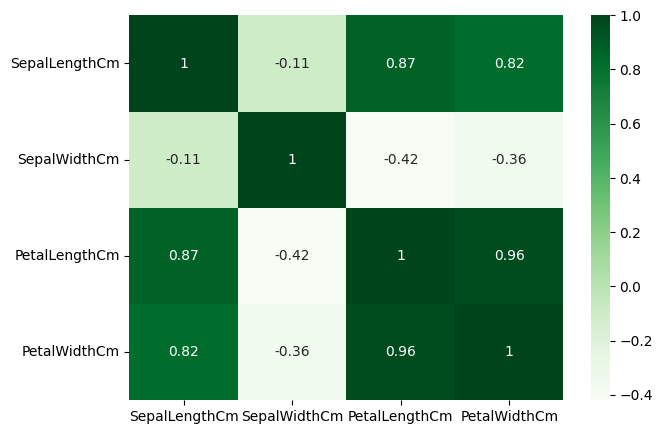

In [19]:
# Plot Heatmap to Check Pairwise Correlation
plt.figure(figsize=(7,5))
#Select only numerical columns for correlation calculation
numerical_data = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='Greens')
plt.show()

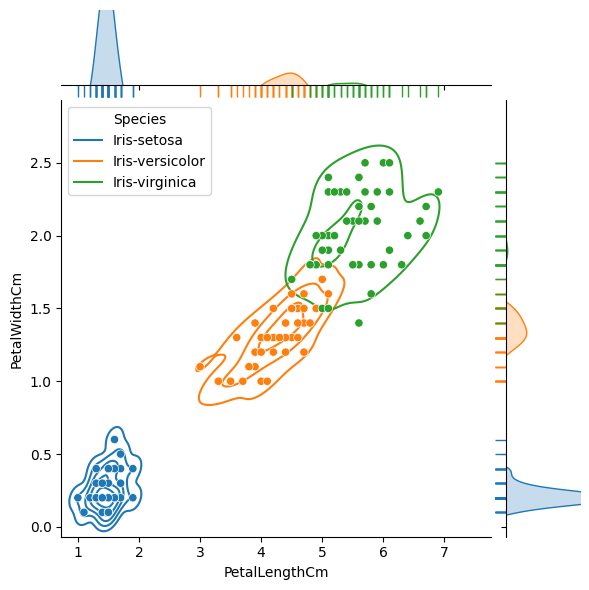

In [20]:
g = sns.jointplot(data=df, x="PetalLengthCm", y="PetalWidthCm", hue = 'Species')
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

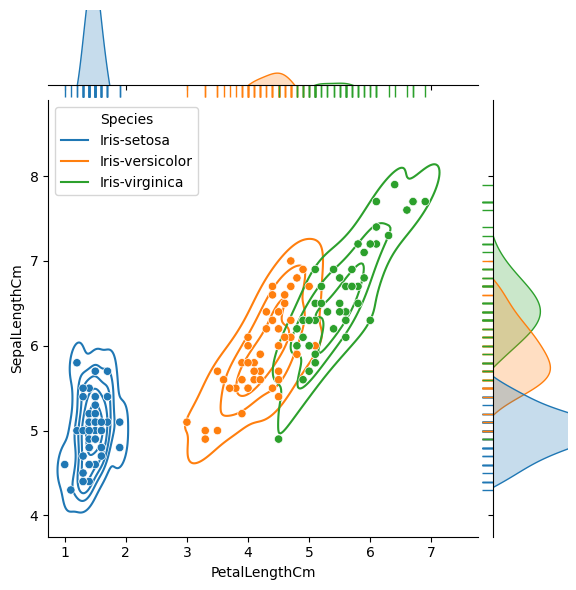

In [21]:
g = sns.jointplot(data=df, x="PetalLengthCm", y="SepalLengthCm", hue = 'Species')
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

## ML

In [22]:
from sklearn import model_selection  # For train/test split and cross-validation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [24]:
# Model Building
x = df.drop(['Species'], axis=1)
y = df['Species']
print(f'x shape: {x.shape} | y shape: {y.shape}')

x shape: (150, 4) | y shape: (150,)


In [25]:
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [26]:
# Test Six Different Algorithms in Loop and Print Accuracy
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier()))
# Evaluate Each Model
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: 0.975000 (0.038188)
KNN: 0.941667 (0.083749)
DT: 0.916667 (0.083333)
NB: 0.941667 (0.065085)
SVC: 0.950000 (0.066667)
RF: 0.933333 (0.072648)


In [27]:
# Train the SVC Model and Make Predictions on the Test Dataset
svcmodel = SVC(gamma='auto')
svcmodel.fit(x_train, y_train)
predictions = svcmodel.predict(x_test)

In [28]:
# Evaluate Predictions
print(accuracy_score(y_test, predictions))

1.0


In [29]:
print(confusion_matrix(y_test, predictions))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


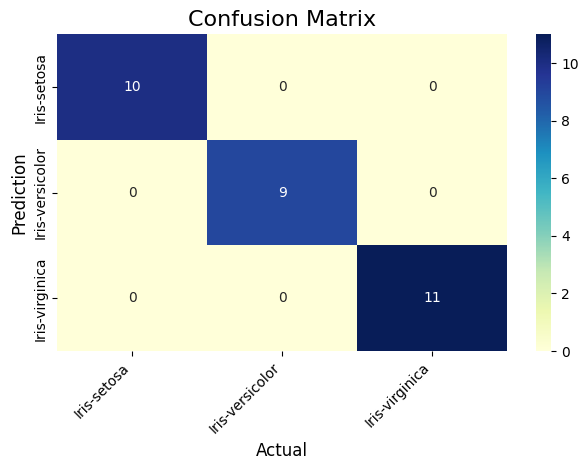

In [30]:
# Plot the Confusion Matrix in a Heatmap
cm = confusion_matrix(y_test, predictions)
# Get Unique ‘Class’ Labels
class_labels = df['Species'].unique()
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_labels, yticklabels=class_labels)
# Rotate x-axis Labels by 45 Degrees for Better Readability
plt.xticks(rotation=45, ha='right')
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
# Adjust the Plot to Ensure All Labels are Visible
plt.tight_layout()
plt.show()

In [31]:
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Part 2: SQL Lite

In [32]:
import sqlite3
import matplotlib.pyplot as plt

In [33]:
path = "/kaggle/input/iris/"
database = path + 'database.sqlite'

from sqlite3 import connect

connection = sqlite3.connect(database) 
print("SQL database connected")

SQL database connected


In [34]:
query = """
SELECT * FROM iris;
"""

table = pd.read_sql_query(query, connection)
print(table)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [35]:
query = """
SELECT Species, COUNT(Species) AS species_counts
FROM iris
GROUP BY Species
ORDER BY Species ASC;
"""

table = pd.read_sql_query(query, connection)
print(table)

           Species  species_counts
0      Iris-setosa              50
1  Iris-versicolor              50
2   Iris-virginica              50


In [36]:
query = """
SELECT SepalLengthCm, COUNT(SepalLengthCm) AS count_sepal_length, Species
FROM iris
GROUP BY SepalLengthCm, Species
ORDER BY SepalLengthCm DESC;
"""

table = pd.read_sql_query(query, connection)
print(table)

    SepalLengthCm  count_sepal_length          Species
0             7.9                   1   Iris-virginica
1             7.7                   4   Iris-virginica
2             7.6                   1   Iris-virginica
3             7.4                   1   Iris-virginica
4             7.3                   1   Iris-virginica
5             7.2                   3   Iris-virginica
6             7.1                   1   Iris-virginica
7             7.0                   1  Iris-versicolor
8             6.9                   1  Iris-versicolor
9             6.9                   3   Iris-virginica
10            6.8                   1  Iris-versicolor
11            6.8                   2   Iris-virginica
12            6.7                   3  Iris-versicolor
13            6.7                   5   Iris-virginica
14            6.6                   2  Iris-versicolor
15            6.5                   1  Iris-versicolor
16            6.5                   4   Iris-virginica
17        

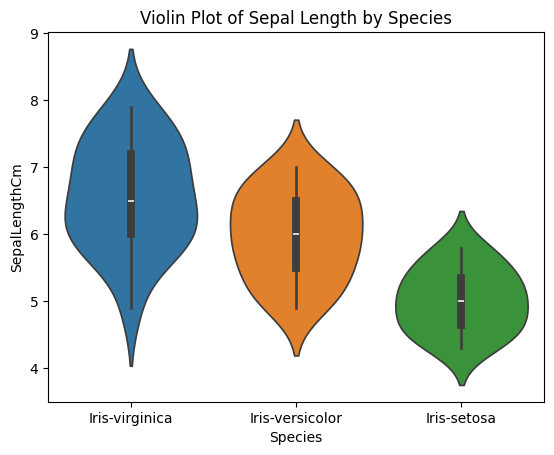

In [37]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.violinplot(x='Species', y='SepalLengthCm', hue = 'Species', data=table)
plt.title('Violin Plot of Sepal Length by Species')
plt.show()

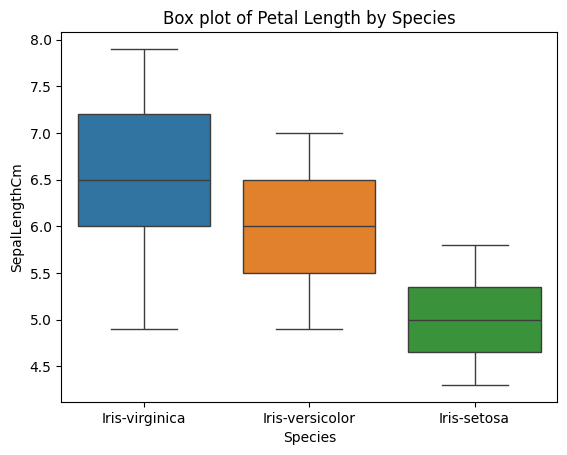

In [38]:
sns.boxplot(x='Species', y='SepalLengthCm', hue = 'Species', data=table)
plt.title('Box plot of Petal Length by Species')
plt.show()

In [39]:
query = """
SELECT SepalWidthCm, COUNT(SepalWidthCm) AS count_sepal_width, Species
FROM iris
GROUP BY SepalWidthCm, Species
ORDER BY SepalWidthCm DESC;
"""

table = pd.read_sql_query(query, connection)
print(table)

    SepalWidthCm  count_sepal_width          Species
0            4.4                  1      Iris-setosa
1            4.2                  1      Iris-setosa
2            4.1                  1      Iris-setosa
3            4.0                  1      Iris-setosa
4            3.9                  2      Iris-setosa
5            3.8                  4      Iris-setosa
6            3.8                  2   Iris-virginica
7            3.7                  3      Iris-setosa
8            3.6                  2      Iris-setosa
9            3.6                  1   Iris-virginica
10           3.5                  6      Iris-setosa
11           3.4                  9      Iris-setosa
12           3.4                  1  Iris-versicolor
13           3.4                  2   Iris-virginica
14           3.3                  2      Iris-setosa
15           3.3                  1  Iris-versicolor
16           3.3                  3   Iris-virginica
17           3.2                  5      Iris-

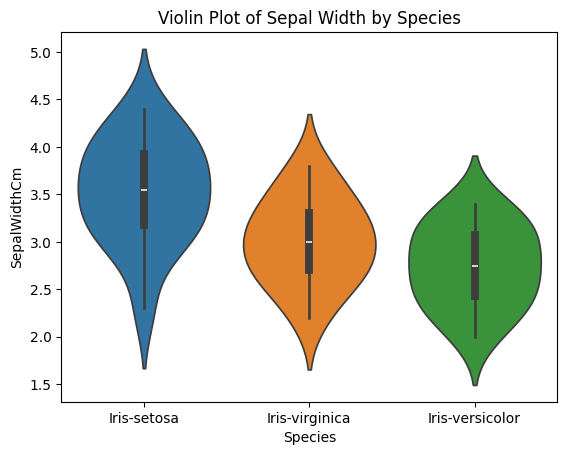

In [40]:
sns.violinplot(x='Species', y='SepalWidthCm', hue = 'Species', data=table)
plt.title('Violin Plot of Sepal Width by Species')
plt.show()

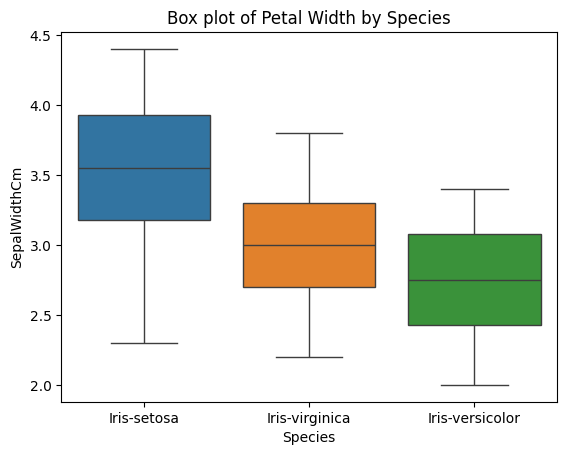

In [41]:
sns.boxplot(x='Species', y='SepalWidthCm', hue = 'Species', data=table)
plt.title('Box plot of Petal Width by Species')
plt.show()

In [42]:
query = """
SELECT PetalLengthCm, COUNT(PetalLengthCm) AS count_petal_length, Species
FROM iris
GROUP BY PetalLengthCm, Species
ORDER BY PetalLengthCm DESC;
"""

table = pd.read_sql_query(query, connection)
print(table)

    PetalLengthCm  count_petal_length          Species
0             6.9                   1   Iris-virginica
1             6.7                   2   Iris-virginica
2             6.6                   1   Iris-virginica
3             6.4                   1   Iris-virginica
4             6.3                   1   Iris-virginica
5             6.1                   3   Iris-virginica
6             6.0                   2   Iris-virginica
7             5.9                   2   Iris-virginica
8             5.8                   3   Iris-virginica
9             5.7                   3   Iris-virginica
10            5.6                   6   Iris-virginica
11            5.5                   3   Iris-virginica
12            5.4                   2   Iris-virginica
13            5.3                   2   Iris-virginica
14            5.2                   2   Iris-virginica
15            5.1                   1  Iris-versicolor
16            5.1                   7   Iris-virginica
17        

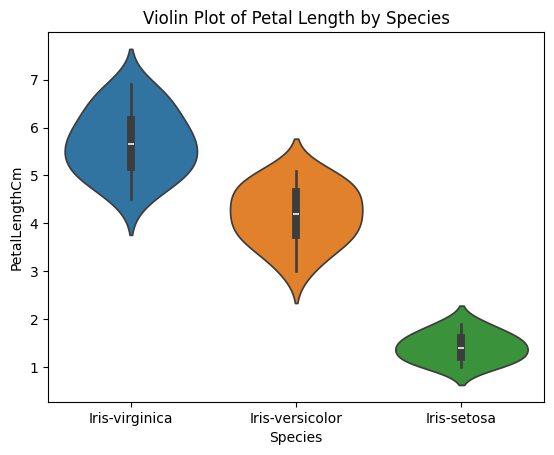

In [43]:
sns.violinplot(x='Species', y='PetalLengthCm', hue = 'Species', data=table)
plt.title('Violin Plot of Petal Length by Species')
plt.show()

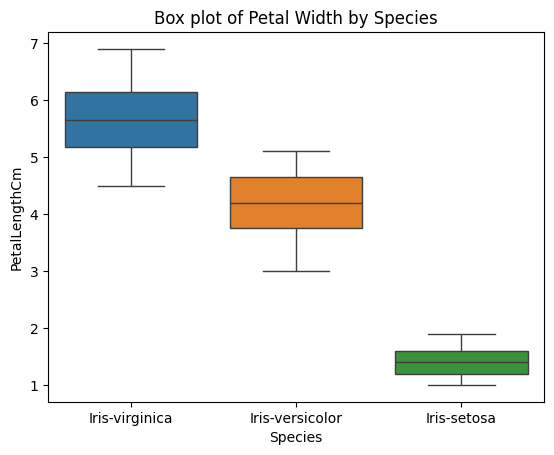

In [44]:
sns.boxplot(x='Species', y='PetalLengthCm', hue = 'Species', data=table)
plt.title('Box plot of Petal Width by Species')
plt.show()

In [45]:
query = """
SELECT PetalWidthCm, COUNT(PetalWidthCm) AS count_petal_length, Species
FROM iris
GROUP BY PetalWidthCm, Species
ORDER BY PetalWidthCm DESC;
"""

table = pd.read_sql_query(query, connection)
print(table)

    PetalWidthCm  count_petal_length          Species
0            2.5                   3   Iris-virginica
1            2.4                   3   Iris-virginica
2            2.3                   8   Iris-virginica
3            2.2                   3   Iris-virginica
4            2.1                   6   Iris-virginica
5            2.0                   6   Iris-virginica
6            1.9                   5   Iris-virginica
7            1.8                   1  Iris-versicolor
8            1.8                  11   Iris-virginica
9            1.7                   1  Iris-versicolor
10           1.7                   1   Iris-virginica
11           1.6                   3  Iris-versicolor
12           1.6                   1   Iris-virginica
13           1.5                  10  Iris-versicolor
14           1.5                   2   Iris-virginica
15           1.4                   7  Iris-versicolor
16           1.4                   1   Iris-virginica
17           1.3            

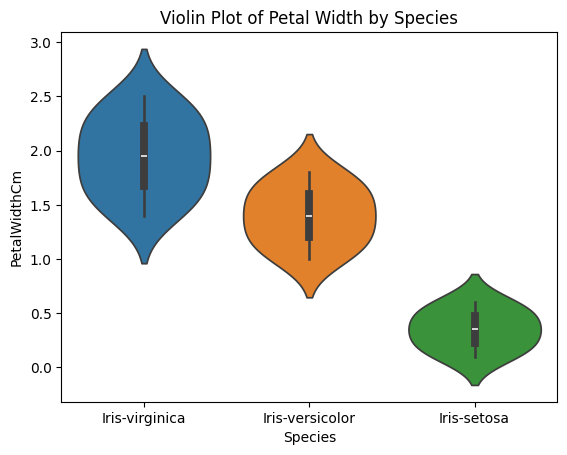

In [46]:
sns.violinplot(x='Species', y='PetalWidthCm', hue = 'Species', data=table)
plt.title('Violin Plot of Petal Width by Species')
plt.show()

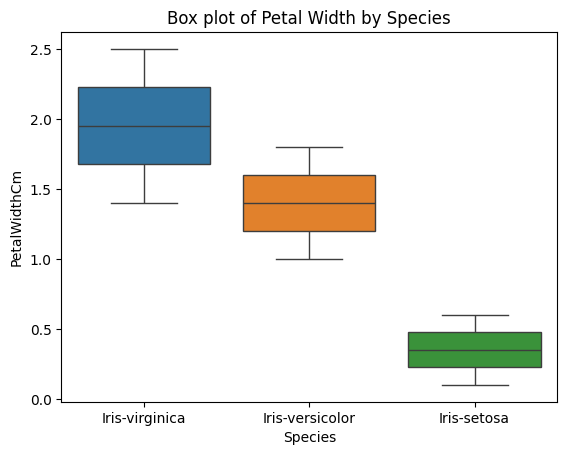

In [47]:
sns.boxplot(x='Species', y='PetalWidthCm', hue = 'Species', data=table)
plt.title('Box plot of Petal Width by Species')
plt.show()